In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
uni = pd.read_csv("/content/Universities.csv")
uni.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [ ]:
uni.describe() #data should be normalized

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [ ]:
#considering only numerical data
uni = uni.iloc[:,1:] # exclude 0thncolumn i.e. univ.name
uni.head()

,Top10,Accept,SFRatio,Expenses,GradRate
0,89,22,13,22704,94
1,100,25,6,63575,81
2,62,59,9,25026,72
3,76,24,12,31510,88
4,83,33,13,21864,90


In [ ]:
# normalizing the numerical data
std = StandardScaler()
uni_normal=std.fit_transform(uni)
uni_normal

array([[ 0.6575195 , -0.88986682,  0.07026045, -0.33141256,  0.82030265],
       [ 1.23521235, -0.73465749, -1.68625071,  2.56038138, -0.64452351],
       [-0.76045386,  1.02438157, -0.93346022, -0.16712136, -1.65863393],
       [-0.02520842, -0.78639393, -0.18066972,  0.29164871,  0.14422904],
       [ 0.34241431, -0.32076595,  0.07026045, -0.39084607,  0.36958691],
       [ 0.6575195 , -0.83813038, -0.68253005,  0.33778044,  0.93298158],
       [ 0.71003703, -0.47597528, -0.18066972,  0.29695528,  0.93298158],
       [-0.13024348, -0.78639393, -0.18066972, -0.51381683,  0.59494478],
       [ 0.76255456, -1.30375836, -0.43159988,  0.85874344,  1.15833946],
       [-0.07772595,  0.24833493, -1.43532055,  2.21481798,  0.0315501 ],
       [ 0.92010716, -0.47597528, -0.68253005,  0.52938275,  0.48226584],
       [ 0.44744937, -0.01034729, -0.43159988,  0.04698077,  0.25690797],
       [ 0.23737924,  0.14486204,  0.07026045, -0.86787073,  0.82030265],
       [-2.02087462,  0.76569936,  1.3

In [ ]:
pca=PCA()
pca_components=pca.fit_transform(uni_normal)
#if you dont consider any parameter it will consider all 6 dimension
#pca2=PCA (n_components=2) #or you can pass specific no. of variables
#pca_components=pd.DataFrame(pca2.fit_transform(uni_normal),columns=['a','b'])

In [ ]:
#The amount of variance that each PCA explains is
pca.explained_variance_ #1st column contains 4.80425527 variance .. upto 6th col

array([3.80717178, 0.81798271, 0.28661821, 0.16714003, 0.1294206 ])

In [ ]:
#in percentage - The amount of variance that each PCA explain is
var = pca.explained_variance_ratio_
var

array([0.73097698, 0.15705268, 0.0550307 , 0.03209089, 0.02484876])

In [ ]:
#Cumulative variance
var1=np.cumsum(np.round(var,decimals=4)*100)
var1 #76 76+13=89  89+4=93 and so on i.e if you can stop upto 3rd column still you

array([ 73.1 ,  88.81,  94.31,  97.52, 100.  ])

In [ ]:
pca.components_  #6 dimensional components

array([[-0.47619056,  0.47771314,  0.43975788, -0.4040156 , -0.43407039],
       [-0.19118287,  0.30976509, -0.44629686,  0.6451998 , -0.50202691],
       [ 0.53879648, -0.20911492,  0.58677037,  0.28389098, -0.49099465],
       [ 0.44550304,  0.00791941, -0.5082957 , -0.57856515, -0.45646705],
       [ 0.49791269,  0.79501194,  0.06905168,  0.0718114 ,  0.33183424]])

In [ ]:
uni.columns

Index(['Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

In [ ]:
#linear combination equation, constant values are taken from those arrays o/p
#PCA1 = -0.45*

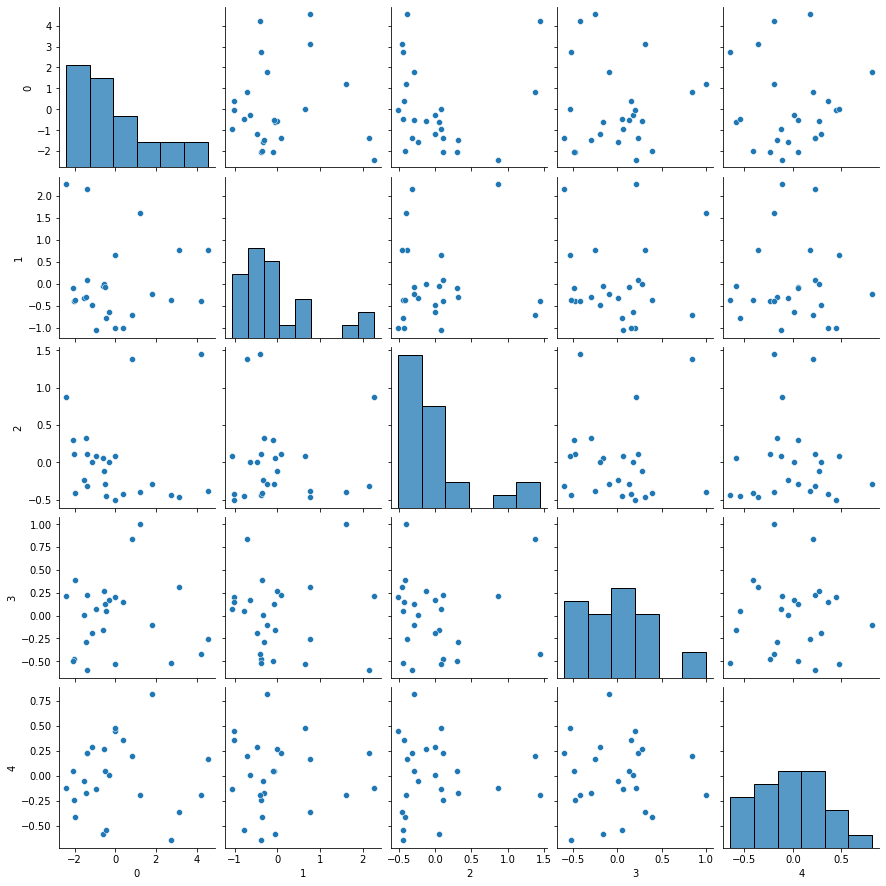

In [ ]:
# Why scatterplot? - After applying PCA there should not be any correlation
import seaborn as sns
sns.pairplot(pd.DataFrame(pca_components))

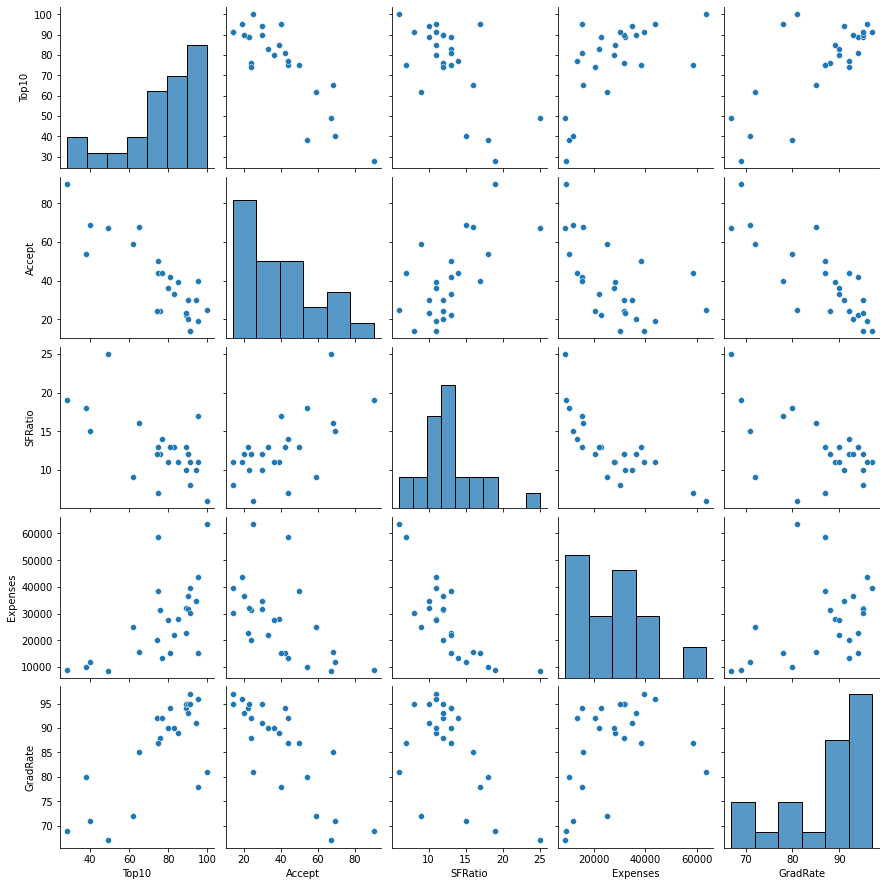

In [ ]:
sns.pairplot(uni) #can check scatterplot with original dataset and see the difference